# Research on car sales ads

Project Intro:
I'm an analyst at Crankshaft List, a website which publishes hundreds of free advertisements for vehicles every day. 
I was requested to study data collected over the last few years and determine which factors influence the price of a vehicle. 

The analysis will include general review on the data set, data preprocessing, adding aiding columns, looking into specific variables using EDA and investigating the connection between different variables to the ads listing period and the connection between the vehicle price to other intersting variables. Stay tuned! :) 

## Data Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the data
try:
    vehicles_data = pd.read_csv('/datasets/vehicles_us.csv')
except:
    print("An error with file reading has occurred")


In [3]:
#Take a look at the data
vehicles_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
#Learn about the data types and missing values
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
#check the number of missing values in each column
print(vehicles_data.isnull().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [6]:
# Looking into the precentage of missing values in the data set
vehicles_data.isna().sum()*100/len(vehicles_data)

pd.DataFrame(round((vehicles_data.isna().mean()*100),2)).style.background_gradient('coolwarm')

vehicles_data.isna().mean() * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

We can see that is_4wd is has the most significant amount of missing values as where model_year has the least. 

In [7]:
vehicles_data.describe(include = 'all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [8]:
#look into the unique values of column "is_4wd" to understand the missing values
vehicles_data['is_4wd'].unique()

array([ 1., nan])

In [9]:
vehicles_data['price'].value_counts()

1         798
6995      719
5995      655
4995      624
3500      620
         ... 
49988       1
36600       1
300000      1
39873       1
11762       1
Name: price, Length: 3443, dtype: int64

We have a data set of 51525 rows. 

**Missing values:**
1. We have missing values in the following columns: model year, cylinders, odometer, paint color and is 4WD. We can assume that 2. The missing values in is 4WD is for the answer - No, since we have values of 1.0 or NaN so all the NaNs are probably suppose to be 0. 
3. The missing values for odometer can be calculated by the median milage according to the model year (we will use the median since it seem like we have out liars in the data (the max value is very high).
4. The missing values for the cylinders can be replaced by the mode of the cylinders by vehicle model. 
5. The missing values for the vehicles paint color will be replaced with undef since we can't know the missing colors and this information was probably left unfilled for a reason. 

**Data types:**

We also reviewed the types of data we have and we will replace some of them in the next step - model year, cylinders and odometer should be int type and is_4wd should be a bolean.

**General thoughts:**
1. The oldest car is pretty old, from 1908, but still can happen, it should be very expenssive. 
2. There is a minimum value of 1 USD in price column which doesn't make sense, we have 798 cars (1.5% of the data we can probably remove this data) with this price which seems like a mistake. 
3. It seems like we have outliars in the price column , the max value is extremely high and the mean is greater than the median meaning the distribution is positively skewed. Also in the odometer column and days_listed the max values are extremely high. We will handle outliars at stage 4.  


In [10]:
#preparing a duplicated data table for the preprocessing 
#so we can leave the original table as is in case we see our preprocessing steps affected our results
vehicles_data_c = vehicles_data.copy()

## Data preprocessing

In [11]:
# Replacing missing values in is_4wd column 
vehicles_data_c['is_4wd'] = vehicles_data_c['is_4wd'].fillna(0)
display(vehicles_data_c.head(10))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [12]:
#replace the missing values for model_year by the median year according to the model type and condition 
#assuming specific models are available for certain years and if it's pretty new it will probably be in a good condition
vehicles_data_c['model_year'] = vehicles_data_c['model_year'].fillna(vehicles_data_c.groupby(['model', 'condition'])['model_year'].transform('median'))
print(vehicles_data_c['model_year'].isnull().sum())

6


We have 6 rows with missing information regarding model_year, this is a very small number, we will drop these rows. 

In [13]:
#dropping the rows with missing model_year information 
vehicles_data_c.dropna(subset = ['model_year'], inplace = True)
print(vehicles_data_c['model_year'].isnull().sum())

0


In [14]:
#replace missing values in the odometer column using the model_year data
# we will calculate the median odometer by each model year
vehicles_data_c['odometer'] = vehicles_data_c['odometer'].fillna(vehicles_data_c.groupby(['model_year'])['odometer'].transform('median'))
vehicles_data_c['odometer'].isnull().sum()


1

We are left with 1 row missing odometer value, we will drop it as well

In [15]:
#dropping the rows with missing odometer information 
vehicles_data_c.dropna(subset = ['odometer'], inplace = True)
print(vehicles_data_c['odometer'].isnull().sum())

0


We still have the missing values of 'cylinders' and 'color', we will check if this informaion effects our price data using corr() method, if not we will change them to 'undef'. 

In [16]:
#exmamin the influence of number of cylinders on the price of the vehicle
print(vehicles_data_c['cylinders'].corr(vehicles_data['price']))

0.296623345819061


It looks like the pearson correlation coefficient shows us a weak connection between these two, still we will change the values to the most common value for each vehicle model. 

In [17]:
# Changing the cylinders missing values with the mode value according to the vehicle model
vehicles_data_c['cylinders'] = vehicles_data_c['cylinders'].fillna(vehicles_data_c.groupby(['model'])['cylinders'].apply(pd.Series.mode)[0])
# verifying no additional missing values
print(vehicles_data_c['cylinders'].isnull().sum())

0


In [18]:
#examing the paint color column
display(vehicles_data_c[vehicles_data_c['paint_color'].isnull()].head(10))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,161656.0,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,41000.0,automatic,sedan,NaN,0.0,2018-07-26,43
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,0.0,2018-09-13,25
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,SUV,NaN,0.0,2018-06-04,121
35,14999,2015.0,dodge charger,good,6.0,gas,63037.0,automatic,sedan,NaN,0.0,2018-05-11,37
36,10499,2013.0,chrysler 300,good,6.0,gas,88042.0,automatic,sedan,NaN,0.0,2018-05-05,22


It looks like the missing paint_color values are missing completey at random, we can't see a connection betwen these missing values to other columns in the data. We can change these values to 'unknown' to mark that in these ads the paint color was left blank. 

In [19]:
#changing the missing values in paint_color to 'unknown'
vehicles_data_c['paint_color'] = vehicles_data_c['paint_color'].fillna('unknown')
#verifying no missing values are left
print(vehicles_data_c['paint_color'].isnull().sum())

0


In [20]:
#changing data types is_4wd column since this is a yes/no column
vehicles_data_c['is_4wd'].astype('bool')

0         True
1         True
2        False
3        False
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524    False
Name: is_4wd, Length: 51518, dtype: bool

In [21]:
#changing data types model year column to int since a year is not a float number
vehicles_data_c['model_year'].astype('int')

0        2011
1        2008
2        2013
3        2003
4        2017
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 51518, dtype: int64

In [22]:
#changing data types cylinders column to int since a it is not a float number
vehicles_data_c['cylinders'].astype('int')

0        6
1        6
2        4
3        8
4        4
        ..
51520    6
51521    4
51522    4
51523    4
51524    4
Name: cylinders, Length: 51518, dtype: int64

In [23]:
#changing data types odometer column to int since we might perform calculations on this values and this way it will be easier
vehicles_data_c['odometer'].astype('int')

0        145000
1         88705
2        110000
3        161656
4         80903
          ...  
51520     88136
51521    181500
51522    128000
51523    139573
51524     90000
Name: odometer, Length: 51518, dtype: int64

## Additional calculations

In [24]:
#Changing condition column to numeric values
vehicles_data_c['condition'] = vehicles_data_c['condition'].replace(['salvage', 'fair', 'good', 'excellent', 'like new', 'new'], [0, 1, 2, 3, 4, 5])
display(vehicles_data_c.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2008.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,1,8.0,gas,161656.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [25]:
#adding date columns - day of the week, month and year when the ad was placed
#first we'll change to datetime values
vehicles_data_c['date_posted'] = pd.to_datetime(vehicles_data_c['date_posted'], format = '%Y-%m-%d')
#adding the new columns
vehicles_data_c['ad_day'] =vehicles_data_c['date_posted'].dt.weekday 
vehicles_data_c['ad_month'] =vehicles_data_c['date_posted'].dt.month
vehicles_data_c['ad_year'] =vehicles_data_c['date_posted'].dt.year


In [26]:
#calculating the vehicles age in a new column
vehicles_data_c['vehicle_age'] = vehicles_data_c['ad_year'] - vehicles_data_c['model_year']

In [27]:
# calculating avg_milage in a new column
vehicles_data_c['avg_milage'] = np.where(vehicles_data_c['vehicle_age'] != 0, vehicles_data_c['odometer'] / vehicles_data_c['vehicle_age'], vehicles_data_c['odometer'])

In [28]:
# review all the new columns
display(vehicles_data_c.head(10))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,vehicle_age,avg_milage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,161656.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,16.0,10103.500000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,6,2018,4.0,14488.500000
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,12,2018,3.0,26404.000000
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,0,1,2019,6.0,18245.500000
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,0,7,2018,6.0,17362.333333
9,9200,2008.0,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,4,2,2019,11.0,13381.000000


## Exploratory data analysis

**Section 1 : Study the following parameters - price, age, odometer, cylinders and condition**

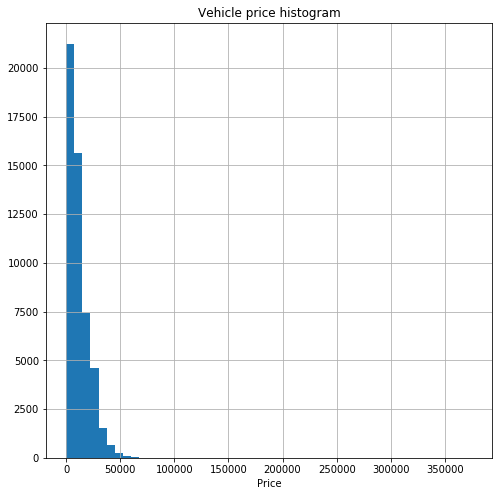

In [29]:
#create Price histogram
vehicles_data_c.hist('price', bins = 50, figsize = (8,8))
plt.title('Vehicle price histogram')
plt.xlabel('Price')
plt.show()

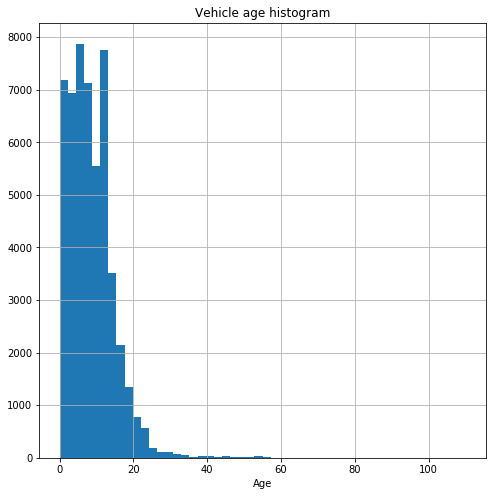

In [30]:
#create vehicle age histogram
vehicles_data_c.hist('vehicle_age', bins = 50, figsize = (8,8))
plt.title('Vehicle age histogram')
plt.xlabel('Age')
plt.show()

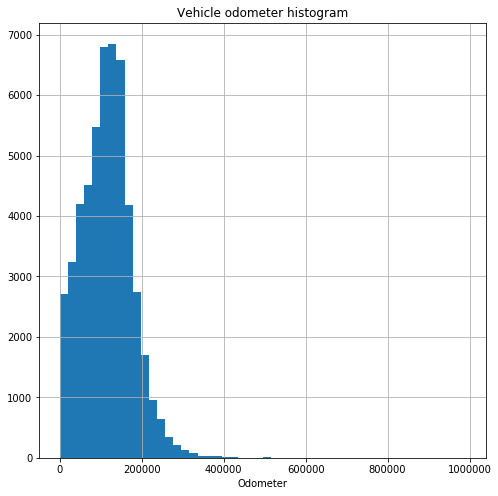

In [31]:
#create odometer histogram
vehicles_data_c.hist('odometer', bins = 50, figsize = (8,8))
plt.title('Vehicle odometer histogram')
plt.xlabel('Odometer')
plt.show()

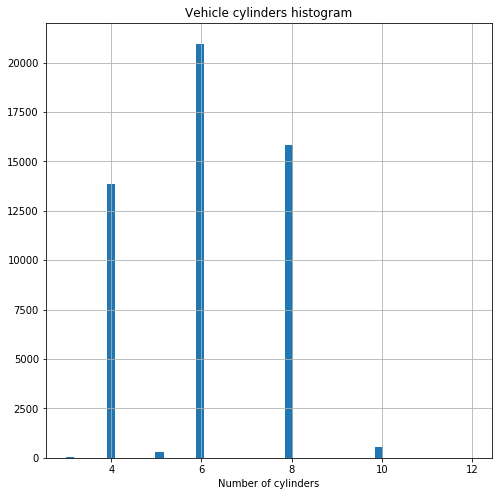

In [32]:
#create cylinders histogram
vehicles_data_c.hist('cylinders', bins = 50, figsize = (8, 8))
plt.title('Vehicle cylinders histogram')
plt.xlabel('Number of cylinders')
plt.show()

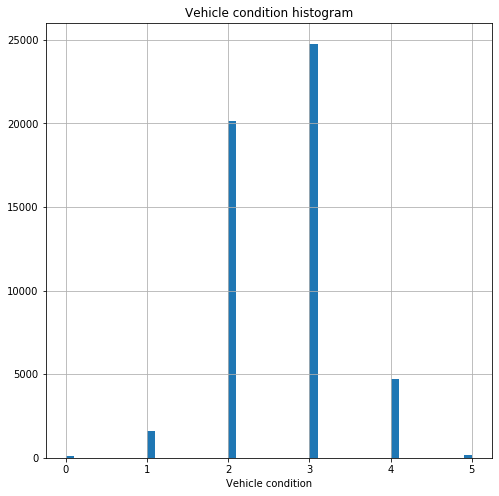

In [33]:
#create condition histogram
vehicles_data_c.hist('condition', bins = 50, figsize = (8,8))
plt.title('Vehicle condition histogram')
plt.xlabel('Vehicle condition')
plt.show()

**Section 2: calculating upper limit and removing outliars**

In [34]:
#creating a function for upper limit calculation

def upper_limit_calc(data):  
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    return upper_limit

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, it is correct to use the IQR method for deleting the outliers, it is rather effective one for this task! More details about working with the outliers you can find by links:
    
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
    
http://colingorrie.github.io/outlier-detection.html#iqr-method
    
https://statisticsbyjim.com/basics/outliers/

In [35]:
#calculating upper limit of price column 
price_upper_limit = upper_limit_calc(vehicles_data_c['price'])
print(price_upper_limit)

34595.0


In [36]:
#calculating upper limit of vehicle age column 
age_upper_limit = upper_limit_calc(vehicles_data_c['vehicle_age'])
print(age_upper_limit)

24.0


In [37]:
#calculating upper limit of odometer column 
odometer_upper_limit = upper_limit_calc(vehicles_data_c['odometer'])
print(odometer_upper_limit)

272140.75


In [38]:
#calculating upper limit of cylinders column 
cylinders_upper_limit = upper_limit_calc(vehicles_data_c['cylinders'])
print(cylinders_upper_limit)

14.0


In [39]:
#calculating upper limit of condition column 
condition_upper_limit = upper_limit_calc(vehicles_data_c['condition'])
print(condition_upper_limit)

4.5


In [40]:
#creating filtered data set by removing the outliars of each column 
vehicles_data_filtered = vehicles_data_c.query('(price < @price_upper_limit) and (vehicle_age < @age_upper_limit) and (odometer < @odometer_upper_limit) and (condition < @condition_upper_limit) and (cylinders < @cylinders_upper_limit)')
vehicles_data_filtered.describe(include = 'all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,vehicle_age,avg_milage
count,48318.000000,48318.000000,48318,48318.000000,48318.000000,48318,48318.000000,48318,48318,48318,48318.000000,48318,48318.000000,48318.000000,48318.000000,48318.000000,48318.000000,48318.000000
unique,NaN,NaN,99,NaN,NaN,5,NaN,3,13,13,NaN,354,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ford f-150,NaN,NaN,gas,NaN,automatic,sedan,white,NaN,2019-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2620,NaN,NaN,45046,NaN,44131,11984,9209,NaN,176,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,11219.800923,2010.080757,NaN,2.630469,6.053334,NaN,114849.083799,NaN,NaN,NaN,0.486051,NaN,39.544393,3.003167,6.635767,2018.306118,8.225361,17709.695739
std,7816.790116,5.015534,NaN,0.691128,1.572943,NaN,55819.325638,NaN,NaN,NaN,0.499811,NaN,28.219421,1.996751,3.472006,0.460884,5.028306,11706.936153
min,1.000000,1995.000000,NaN,0.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,4999.000000,2007.000000,NaN,2.000000,4.000000,NaN,77000.000000,NaN,NaN,NaN,0.000000,NaN,19.000000,1.000000,3.000000,2018.000000,4.000000,11055.263889


**Section 3: reviewing the filtered data**

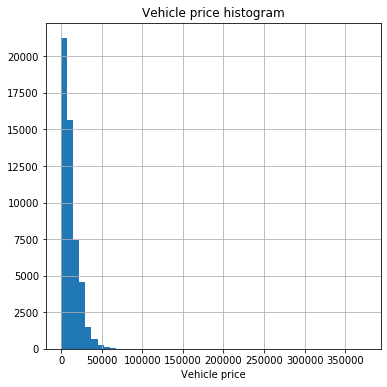

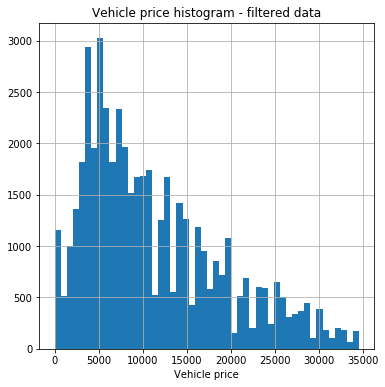

In [41]:
#price histograms with filtered data
vehicles_data_c.hist('price', bins = 50, figsize = (6,6))
plt.title('Vehicle price histogram')
plt.xlabel('Vehicle price')
plt.show()
vehicles_data_filtered.hist('price', bins = 50, figsize = (6,6))
plt.title('Vehicle price histogram - filtered data')
plt.xlabel('Vehicle price')
plt.show()


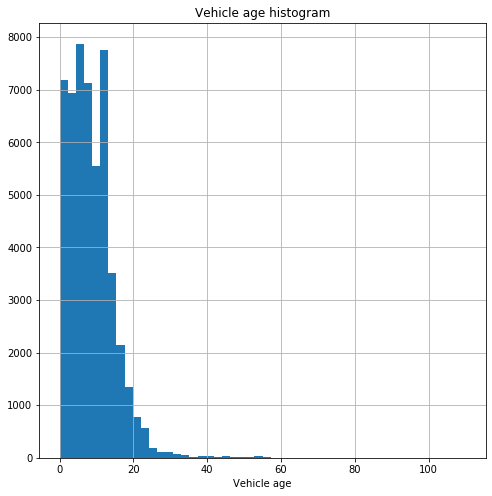

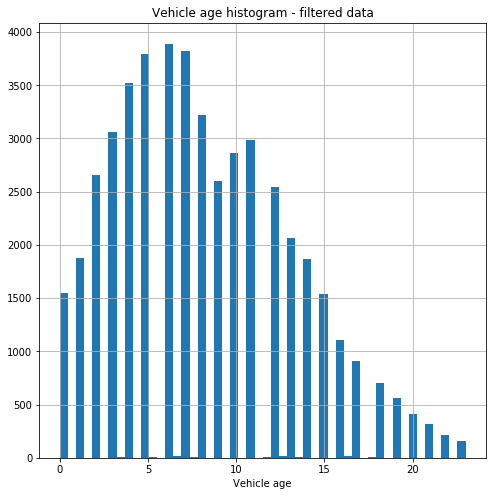

In [42]:
#age histogram with filtered data
vehicles_data_c.hist('vehicle_age',bins = 50, figsize = (8,8))
plt.title('Vehicle age histogram')
plt.xlabel('Vehicle age')
plt.show()
vehicles_data_filtered.hist('vehicle_age',bins = 50, figsize = (8,8))
plt.title('Vehicle age histogram - filtered data')
plt.xlabel('Vehicle age')
plt.show()

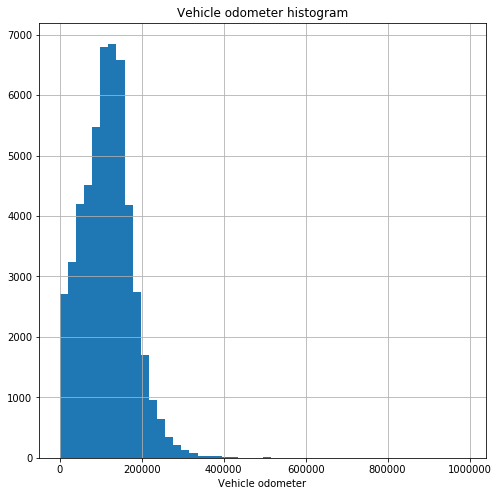

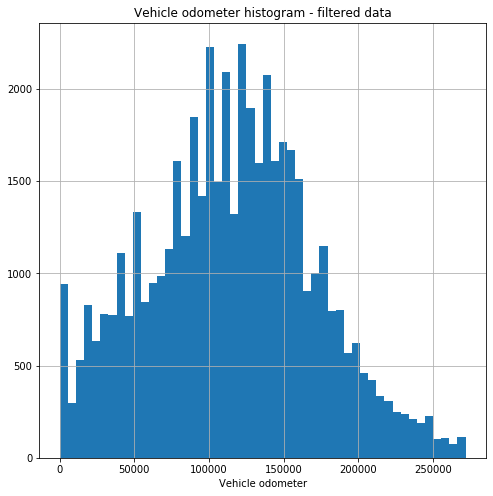

In [43]:
#odometer histogram - filterd data
vehicles_data_c.hist('odometer', bins = 50, figsize = (8,8))
plt.title('Vehicle odometer histogram')
plt.xlabel('Vehicle odometer')
plt.show()
vehicles_data_filtered.hist('odometer', bins = 50, figsize = (8,8))
plt.title('Vehicle odometer histogram - filtered data')
plt.xlabel('Vehicle odometer')
plt.show()

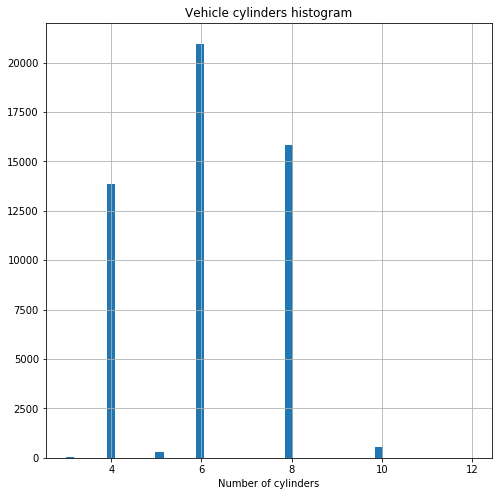

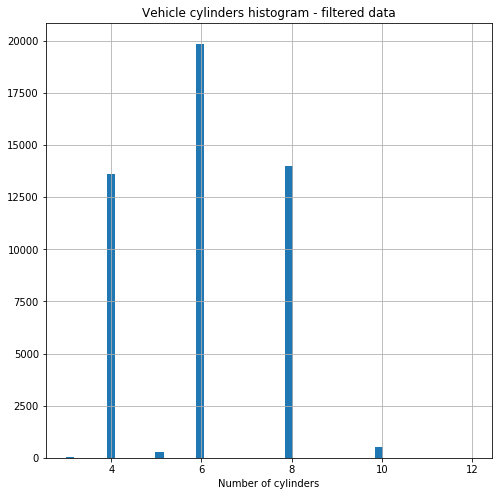

In [44]:
#create cylinders histogram - filtered data
vehicles_data_c.hist('cylinders', bins = 50, figsize = (8, 8))
plt.title('Vehicle cylinders histogram')
plt.xlabel('Number of cylinders')
plt.show()
vehicles_data_filtered.hist('cylinders', bins = 50, figsize = (8, 8))
plt.title('Vehicle cylinders histogram - filtered data')
plt.xlabel('Number of cylinders')
plt.show()

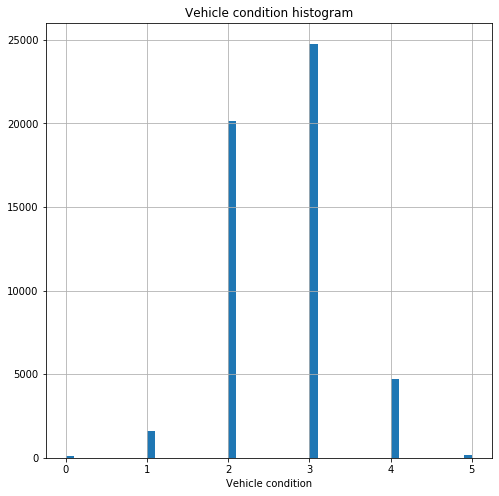

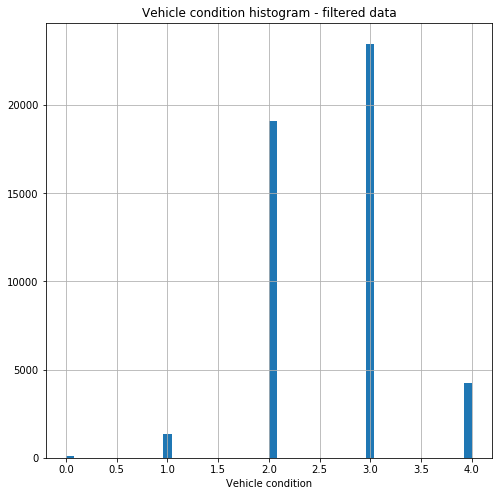

In [45]:
#condition histogram filtered data
vehicles_data_c.hist('condition', bins = 50, figsize = (8,8))
plt.title('Vehicle condition histogram')
plt.xlabel('Vehicle condition')
plt.show()
vehicles_data_filtered.hist('condition',bins = 50, figsize = (8,8))
plt.title('Vehicle condition histogram - filtered data')
plt.xlabel('Vehicle condition')
plt.show()

**Histogram conclusions:**

When looking at the histograms before and after applied "upper limit" filter, we can see the range more clearly.

Price histogram:
in the first historam it might look like most of the prices are close to 0 and that the range goes up to 350000 USD, when looking at the filtered data we see that the amount of cars arond the 0 is pretty small and the peek is actually arount the 5000 USD with a range of up to 35000 USD which is 10 times smaller then what we saw before. 

Vehicle age histogram:
Same here we saw a wider range of age at the first histogram with a high concentration in the low numbers near the o while in the filtered histogram we see the range was minimized to 20 years with a peek around the 5 years. 

Odometer histogram: 
The range was minimized by 4 allowing us to see the peek values around 100,000-150,000.

The cylinders histogram and vehicle condition histograms look pretty much the same before and after applying the upper limit filter, probably means not many outliars for these parameters. 

**Section 4: analyzing days_listed parameter**

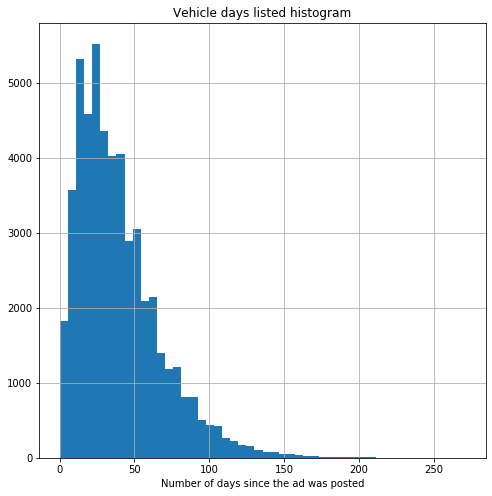

In [46]:
# investigating days_listed data
#first with the clean data set
vehicles_data_c.hist('days_listed', bins = 50, figsize=(8,8))
plt.title('Vehicle days listed histogram')
plt.xlabel('Number of days since the ad was posted')
plt.show()

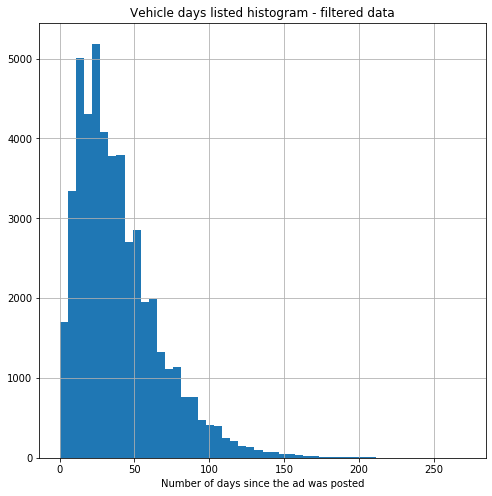

In [47]:
#now with the filtered data set
vehicles_data_filtered.hist('days_listed', bins = 50, figsize = (8,8))
plt.title('Vehicle days listed histogram - filtered data')
plt.xlabel('Number of days since the ad was posted')
plt.show()

There's no significant difference when looking at the filtered vs. non filtered data histograms for days listed, we will continue with the filtered data to be aligned with the rest of the analysis. 

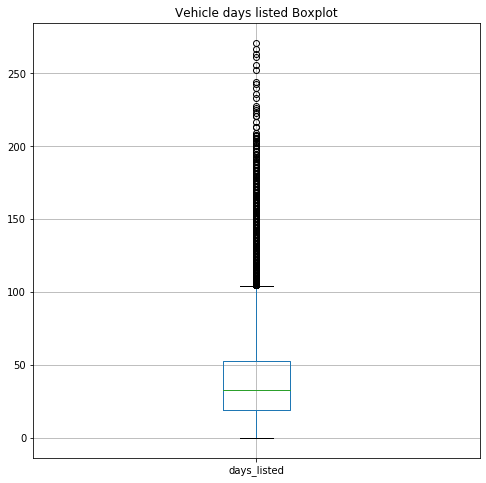

In [48]:
#looking at the days_listed boxplot 
vehicles_data_filtered.boxplot('days_listed', figsize = (8,8))
plt.title('Vehicle days listed Boxplot')
plt.show()

We can see clearly that we have a lot of outliars, we will further investigate these values.

In [49]:
#learning about the days_listed some more
vehicles_data_filtered['days_listed'].describe()

count    48318.000000
mean        39.544393
std         28.219421
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

The mean value is ~39.54 while the median is 33, which mean that the data is skewed to the right. 

In [50]:
#looking for the typical number of days listed by calculating the mode value in our data set
vehicles_data_filtered['days_listed'].mode()

0    18
dtype: int64

The most typical lifetime of an ad according to the mode is either 0 days which means we have a high number of ads posted the same day when these data was exported and 18 days which might be the typical amount of days until a car is sold or the ad is being removed from another reason. 

In [51]:
#calculating upper limit of days_listed column 
dayslisted_upper_limit = upper_limit_calc(vehicles_data_filtered['days_listed'])
print(dayslisted_upper_limit)

104.0


In [52]:
#looking into the data of ads that were listed for longer than the upper limit
vehicles_data_filtered.query('days_listed > @dayslisted_upper_limit').describe(include = 'all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,vehicle_age,avg_milage
count,1514.000000,1514.000000,1514,1514.000000,1514.000000,1514,1514.000000,1514,1514,1514,1514.000000,1514,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000
unique,NaN,NaN,98,NaN,NaN,4,NaN,3,12,13,NaN,350,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,chevrolet silverado 1500,NaN,NaN,gas,NaN,automatic,SUV,white,NaN,2019-02-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,67,NaN,NaN,1419,NaN,1390,397,302,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,11052.433950,2010.014201,NaN,2.636724,6.073316,NaN,116205.378137,NaN,NaN,NaN,0.489432,NaN,128.529723,3.003963,6.482166,2018.331572,8.317371,17362.655326
std,7690.804781,4.914735,NaN,0.664558,1.568203,NaN,55012.893542,NaN,NaN,NaN,0.500053,NaN,24.602419,2.001648,3.505827,0.470934,4.918688,10448.576893
min,1.000000,1995.000000,NaN,0.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,105.000000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,5223.750000,2007.000000,NaN,2.000000,4.000000,NaN,78299.000000,NaN,NaN,NaN,0.000000,NaN,111.000000,1.000000,3.000000,2018.000000,5.000000,10922.660714


In [53]:
#looking into the data of ads that were listed for shorter period than the upper limit to seek for the reason 
vehicles_data_filtered.query('days_listed < @dayslisted_upper_limit').describe(include = 'all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,vehicle_age,avg_milage
count,46726.000000,46726.000000,46726,46726.000000,46726.000000,46726,46726.000000,46726,46726,46726,46726.000000,46726,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000
unique,NaN,NaN,99,NaN,NaN,5,NaN,3,13,13,NaN,354,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ford f-150,NaN,NaN,gas,NaN,automatic,sedan,white,NaN,2019-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2550,NaN,NaN,43553,NaN,42668,11591,8893,NaN,172,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,11227.363502,2010.085445,NaN,2.630163,6.052647,NaN,114786.598992,NaN,NaN,NaN,0.486046,NaN,36.553525,3.003082,6.639815,2018.305397,8.219952,17724.896409
std,7822.238534,5.018630,NaN,0.692014,1.572983,NaN,55845.629562,NaN,NaN,NaN,0.499811,NaN,23.052408,1.996442,3.470867,0.460580,5.031827,11751.210760
min,1.000000,1995.000000,NaN,0.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,4999.000000,2007.000000,NaN,2.000000,4.000000,NaN,77000.000000,NaN,NaN,NaN,0.000000,NaN,18.000000,1.000000,3.000000,2018.000000,4.000000,11063.000000


Looking at the above information we can't see a specific difference between the parameters of the ads that remained posted for a longer period vs. the shorter period. 
Maybe the difference is hidden in the categorial parameters. 

In [54]:
long_ads = vehicles_data_filtered.query('days_listed > @dayslisted_upper_limit')
long_ads['paint_color'].value_counts()

white      302
unknown    260
black      213
silver     189
grey       142
blue       140
red        139
custom      40
brown       38
green       38
orange       6
yellow       5
purple       2
Name: paint_color, dtype: int64

In [55]:
long_ads['model'].value_counts()

chevrolet silverado 1500      67
ford f-150                    67
ram 1500                      52
chevrolet silverado           38
jeep wrangler                 35
                              ..
nissan maxima                  5
nissan frontier                5
ford f350                      4
hyundai santa fe               4
jeep grand cherokee laredo     3
Name: model, Length: 98, dtype: int64

In [56]:
long_ads['type'].value_counts()

SUV            397
sedan          374
truck          318
pickup         177
coupe           68
wagon           58
mini-van        47
hatchback       30
van             25
offroad          8
convertible      8
other            4
Name: type, dtype: int64

In [57]:
long_ads['fuel'].value_counts()

gas       1419
diesel      75
hybrid      16
other        4
Name: fuel, dtype: int64

In [58]:
long_ads['transmission'].value_counts()

automatic    1390
manual         79
other          45
Name: transmission, dtype: int64

It doesn't seem like a specific color, vehicle type or vehicle model makes the difference between long advertisment to short. as for the fuel and transmission it seems that there is a majority for fuel type - gas, and transmission - automatic, but it might just be the majority in the entire data set. We will check if these ads are the greater precentage from these catrgories. 

In [59]:
# check if fuel type is the reason
print(long_ads['fuel'].value_counts()['gas'] / len(long_ads) * 100)
print(vehicles_data_filtered['fuel'].value_counts()['gas'] / len(vehicles_data_filtered) *100)

93.72523117569352
93.22819653131337


In [60]:
#check if automatic transmission is the reason 
print(long_ads['transmission'].value_counts()['automatic'] / len(long_ads) * 100)
print(vehicles_data_filtered['transmission'].value_counts()['automatic'] / len(vehicles_data_filtered) * 100)

91.8097754293263
91.33449232170206


looks like the automatic car and gas fueled cars are the majority of the ads entirly (long ads and short ads), we couldn't recognize the source of longer ads postings

**Section 5: Analyzing the number of ads and the average price for each type of vehicle**

In [61]:
# creating a pivot table 
type_table = pd.pivot_table(vehicles_data_filtered, index = 'type', values = 'price', aggfunc = ('mean', 'count'))
type_table.columns = ['ads_number', 'avg_price']
display(type_table)

,ads_number,avg_price
type,,
SUV,11901.0,10430.618099
bus,21.0,18107.428571
convertible,336.0,13081.815476
coupe,2003.0,13517.692961
hatchback,1002.0,6823.848303
mini-van,1145.0,8029.620087
offroad,182.0,14344.049451
other,233.0,10542.137339
pickup,6303.0,15043.157703


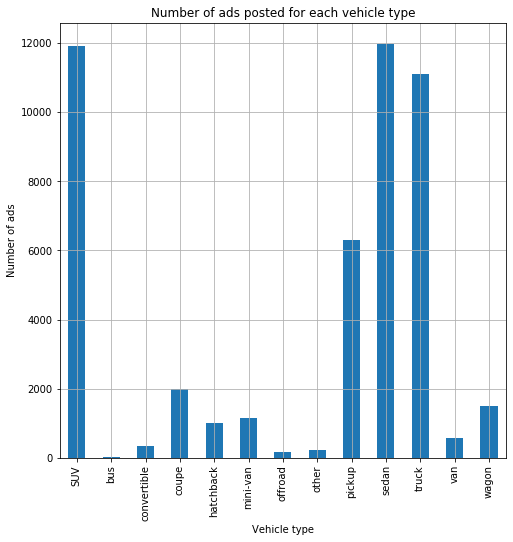

In [62]:
#ploting the number of ads for each vehicle type
type_table['ads_number'].plot(kind = 'bar', figsize=(8,8), grid = True)
plt.title('Number of ads posted for each vehicle type')
plt.xlabel('Vehicle type')
plt.ylabel('Number of ads')
plt.show()

As we can see from the bar chart the vehicle types with the highest number of ads are: SUV with 11901 ads and Sedan with 11984.

**Section 6: What factors impact the price most?**

In [63]:
#Looking into the most popular vehicle types - SUV & Sedan to learn what effects on their price
#creating a new table for SUVs only
SUV_data = vehicles_data_filtered.query('type == "SUV"')
#creating a new table for Sedans only
sedan_data = vehicles_data_filtered.query('type == "sedan"')

In [64]:
#SUV correlation materix
SUV_data.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,ad_day,ad_month,ad_year,vehicle_age,avg_milage
price,1.000000,0.581574,0.263010,-0.009687,-0.522952,0.113464,-0.020103,0.011170,-0.007279,0.000895,-0.579546,0.261427
model_year,0.581574,1.000000,0.334605,-0.269082,-0.640354,-0.071950,-0.016877,0.001563,-0.014341,0.011274,-0.995601,0.541183
condition,0.263010,0.334605,1.000000,-0.089845,-0.323672,-0.012420,-0.010463,0.006438,0.003661,-0.003735,-0.333836,0.089023
cylinders,-0.009687,-0.269082,-0.089845,1.000000,0.228325,0.118361,0.016124,-0.011754,-0.003313,0.000247,0.268205,-0.151619
odometer,-0.522952,-0.640354,-0.323672,0.228325,1.000000,0.030287,0.012967,0.004844,0.012197,-0.009102,0.637361,-0.020947
is_4wd,0.113464,-0.071950,-0.012420,0.118361,0.030287,1.000000,-0.005288,0.015571,-0.002548,-0.005406,0.071203,-0.032696
days_listed,-0.020103,-0.016877,-0.010463,0.016124,0.012967,-0.005288,1.000000,-0.009143,-0.006030,-0.000507,0.016773,-0.018265
ad_day,0.011170,0.001563,0.006438,-0.011754,0.004844,0.015571,-0.009143,1.000000,0.020620,-0.018012,-0.003245,-0.001298
ad_month,-0.007279,-0.014341,0.003661,-0.003313,0.012197,-0.002548,-0.006030,0.020620,1.000000,-0.816931,-0.062256,0.105362
ad_year,0.000895,0.011274,-0.003735,0.000247,-0.009102,-0.005406,-0.000507,-0.018012,-0.816931,1.000000,0.082467,-0.129014


We can see there's a correlation between (from strongest to weakest):
1. price and vehicle age - prices decrease when vehicle is older (Pearson correlation coefficient -0.579)
2. price and odometer - prices decrease when vehicle odometer is higher (Pearson correlation coefficient -0.522)
3. price and condition - prices increase when vehicle condition is better (higher number) (Pearson correlation coefficient +0.263)

In [65]:
#sedan correlation materix
sedan_data.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,ad_day,ad_month,ad_year,vehicle_age,avg_milage
price,1.000000,0.624197,0.291956,-0.040183,-0.563092,0.041673,0.002477,-0.003722,-0.020909,0.017513,-0.620635,0.270872
model_year,0.624197,1.000000,0.320324,-0.108834,-0.630642,0.071750,-0.000540,0.006629,-0.029896,0.023372,-0.994771,0.516262
condition,0.291956,0.320324,1.000000,-0.036358,-0.320560,0.017315,-0.011563,-0.003105,-0.009978,0.011588,-0.318230,0.084097
cylinders,-0.040183,-0.108834,-0.036358,1.000000,0.065848,0.199043,0.007129,-0.002666,-0.007823,0.009020,0.109446,-0.068358
odometer,-0.563092,-0.630642,-0.320560,0.065848,1.000000,-0.061725,0.003138,-0.004410,0.021413,-0.011571,0.627668,0.033552
is_4wd,0.041673,0.071750,0.017315,0.199043,-0.061725,1.000000,0.005270,-0.017618,0.006795,-0.002899,-0.071842,0.008674
days_listed,0.002477,-0.000540,-0.011563,0.007129,0.003138,0.005270,1.000000,0.013545,-0.007434,0.012989,0.001865,-0.004772
ad_day,-0.003722,0.006629,-0.003105,-0.002666,-0.004410,-0.017618,0.013545,1.000000,0.002953,-0.005178,-0.007139,0.003844
ad_month,-0.020909,-0.029896,-0.009978,-0.007823,0.021413,0.006795,-0.007434,0.002953,1.000000,-0.818114,-0.053767,0.122740
ad_year,0.017513,0.023372,0.011588,0.009020,-0.011571,-0.002899,0.012989,-0.005178,-0.818114,1.000000,0.078854,-0.147328


We can see there's a correlation between (from strongest to weakest):
1. price and vehicle age - prices decrease when vehicle is older (Pearson correlation coefficient -0.620)
2. price and odometer - prices decrease when vehicle odometer is higher (Pearson correlation coefficient -0.563)
3. price and condition - prices increase when vehicle condition is better (higher number) (Pearson correlation coefficient +0.2919)

Similar to what we saw for the SUV vehicle types

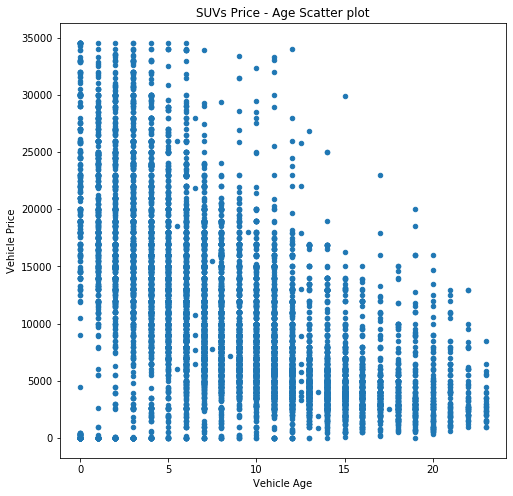

In [66]:
#looking into the relationship between the price and vehicle age (SUV)
SUV_data.plot(x='vehicle_age', y='price', kind='scatter', figsize=(8, 8))
plt.title('SUVs Price - Age Scatter plot')
plt.xlabel('Vehicle Age')
plt.ylabel('Vehicle Price')
plt.show()

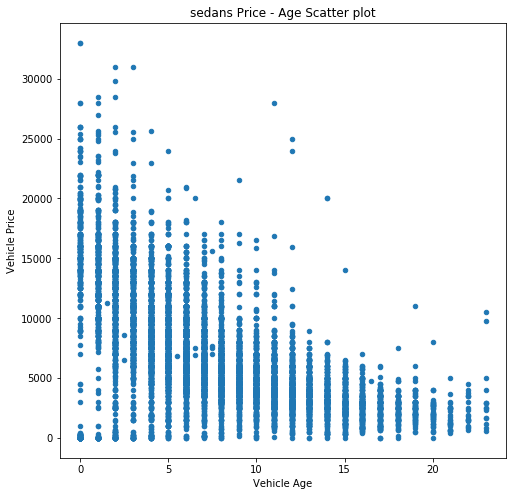

In [67]:
#looking into the relationship between the price and vehicle age (sedan)
sedan_data.plot(x='vehicle_age', y='price', kind='scatter', figsize=(8,8)) 
plt.title('sedans Price - Age Scatter plot')
plt.xlabel('Vehicle Age')
plt.ylabel('Vehicle Price')
plt.show()

We can definetly see that the vehicle age impacts the vehicle's price - newer car costs more money. we see it more clearly when looking at the sedan vehicle type. In the case of the SUV the car doesn't need to be brand new to cost a lot, the first 5 years are pretty similar as for the sedan you can see a difference within the first years. 

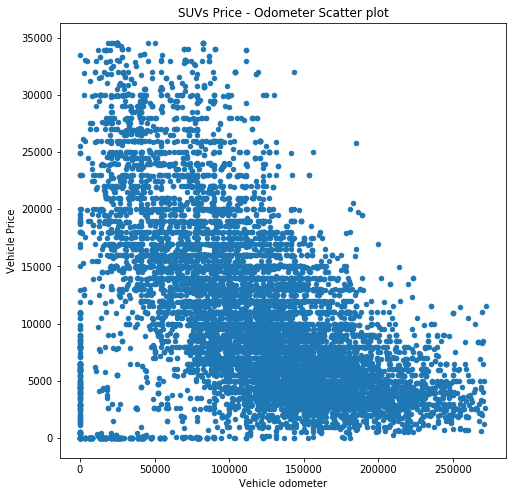

In [68]:
#looking into the relationship between the price and vehicle milage (SUV)
SUV_data.plot(x='odometer', y='price', kind='scatter', figsize=(8,8))
plt.title('SUVs Price - Odometer Scatter plot')
plt.xlabel('Vehicle odometer')
plt.ylabel('Vehicle Price')
plt.show()

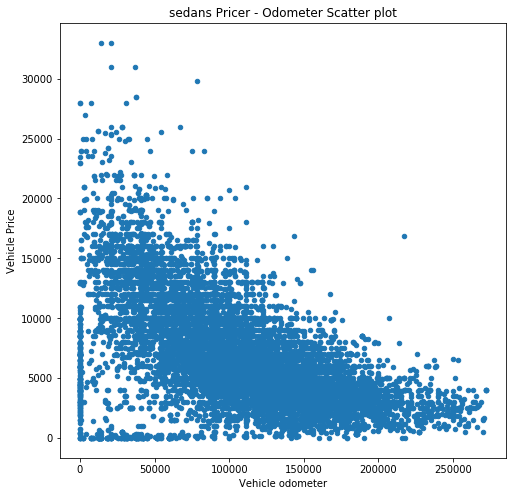

In [69]:
#looking into the relationship between the price and vehicle milage (sedan)
sedan_data.plot(x='odometer', y='price', kind='scatter', figsize = (8,8))
plt.title('sedans Pricer - Odometer Scatter plot')
plt.xlabel('Vehicle odometer')
plt.ylabel('Vehicle Price')
plt.show()

We see a connection between the milage and vehicles price -  as the milage grows the price lowers. I think in this case it is more distinct for the SUV vehicles. 

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
You analyzed the condition as quantitative variable but I suppose that this variable can be treated as categorical (despite the fact that we replace categories in this column with numbers, it is still can be considered as categorical), so it is better to analyze it as categorical, i.e. you can try to use graphical method here (barplot or boxplot), scatter plot is not very suitable here.

In [70]:
#looking at the categorial variables
#verifying we have at least 50 ads of each type so the parameter is valid for analysis (SUVs)
print(SUV_data['condition'].value_counts())

3    6316
2    4190
4    1090
1     290
0      15
Name: condition, dtype: int64


Not enough ads with Salvage conditions for SUVs, I'll drop these rows for our analysis

In [71]:
#creating a new table which includes only the conditions with 50 ads ot above
SUV_cond = SUV_data.query('condition != 0')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


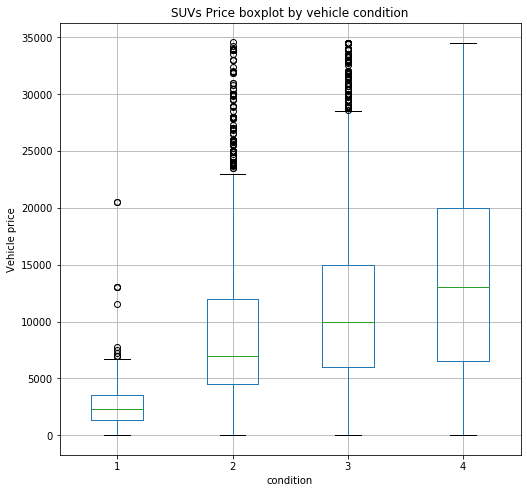

In [72]:
#the relationship between the price and vehicle condition (SUV)
SUV_cond.boxplot(column = 'price', by = 'condition', figsize = (8, 8))
plt.title('SUVs Price boxplot by vehicle condition')
plt.ylabel('Vehicle price')
plt.suptitle('')
plt.show()

In [73]:
#verifying we have at least 50 ads of each type so the parameter is valid for analysis (sedans)
print(sedan_data['condition'].value_counts())

3    6106
2    4261
4    1308
1     268
0      41
Name: condition, dtype: int64


Again here, not enough ads for 'Salvage' condition, I'll drop these rows for the current analysis

In [74]:
#creating a new table which includes only the conditions with 50 ads ot above
sedan_cond = sedan_data.query('condition != 0')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


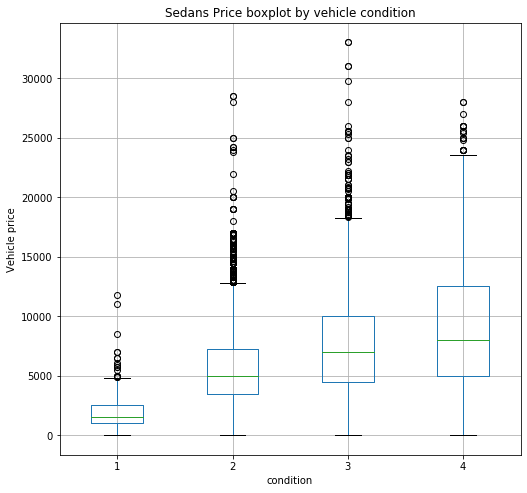

In [75]:
#the relationship between the price and vehicle condition (sedans)
sedan_cond.boxplot(column = 'price', by = 'condition', figsize = (8, 8))
plt.title('Sedans Price boxplot by vehicle condition')
plt.ylabel('Vehicle price')
plt.suptitle('')
plt.show()

These plots show there is a connection between condition to price - a vehicle in excellent condition will cost more than a vehicle in good condition.  

In [76]:
#looking into the relationship between the price and vehicle transmission type (SUV)
#verifying we have at least 50 ads of each type so the parameter is valid for analysis
print(SUV_data['transmission'].value_counts())

automatic    11280
manual         462
other          159
Name: transmission, dtype: int64


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


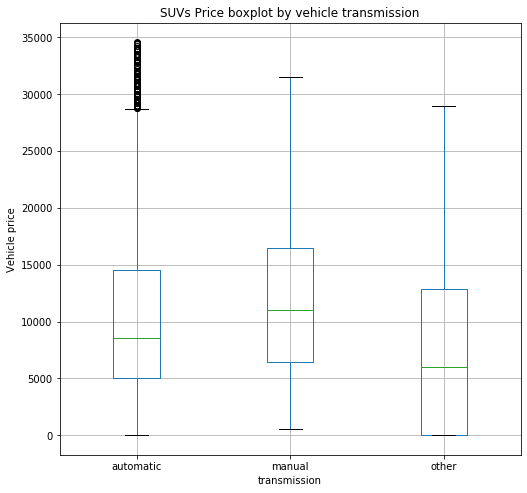

In [77]:
#we have 3 transmission types: automatic, manual and other, we will create a boxplot for each type 
#SUV transmission
SUV_data.boxplot(column = 'price', by = 'transmission', figsize = (8, 8))
plt.title('SUVs Price boxplot by vehicle transmission')
plt.ylabel('Vehicle price')
plt.suptitle('')
plt.show()

It looks like for the SUVs manual transmission is a little bit more expenssive than the automatic transmission 

In [78]:
#doint the same analysis for sedan 
#verifying we have at least 50 ads of each type so the parameter is valid for analysis
print(sedan_data['transmission'].value_counts())

automatic    11274
manual         579
other          131
Name: transmission, dtype: int64


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


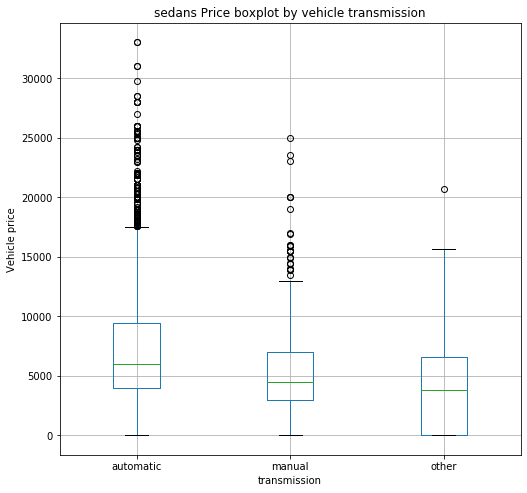

In [79]:
#sedan transmission
sedan_data.boxplot(column = 'price', by = 'transmission', figsize = (8, 8))
plt.title('sedans Price boxplot by vehicle transmission')
plt.ylabel('Vehicle price')
plt.suptitle('')
plt.show()

In the case of the sedan we can see that the automatic cars are more expenssive than the manual transmission cars. 

In [80]:
#looking into the relationship between the price and vehicle paint color (SUV)
#verifying we have at least 50 ads of each type so the parameter is valid for analysis
print(SUV_data['paint_color'].value_counts())

unknown    2141
black      2097
white      1870
silver     1529
grey       1146
blue       1011
red         872
green       420
brown       352
custom      298
orange       81
yellow       45
purple       39
Name: paint_color, dtype: int64


In [81]:
#creating a new table which includes only the paint colors with 50 ads ot above
SUV_paint = SUV_data.query('(paint_color != "yellow") and (paint_color != "purple")')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


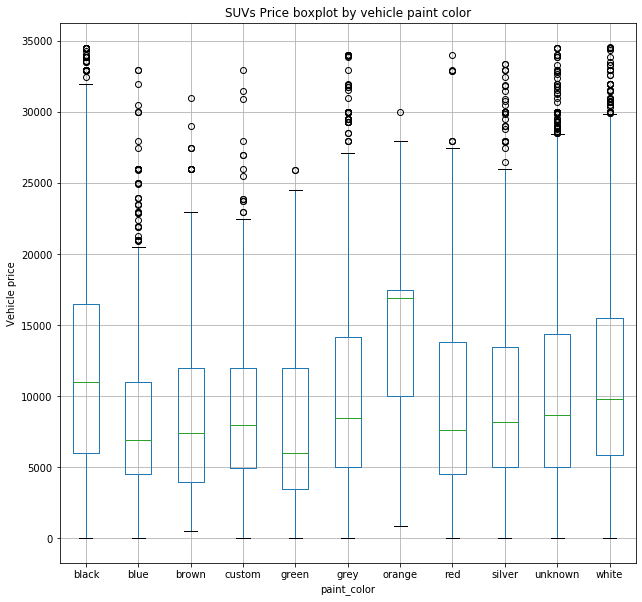

In [82]:
#SUV paint color box plots 
SUV_paint.boxplot(column = 'price', by = 'paint_color', figsize = (10, 10))
plt.title('SUVs Price boxplot by vehicle paint color')
plt.ylabel('Vehicle price')
plt.suptitle('')
plt.show()

It seems like most of the vehicle paint colors are in the same price range. Thoght, Black, white and orange are a bit above the other. 

In [83]:
#looking into the relationship between the price and vehicle paint color (sedan)
#verifying we have at least 50 ads of each type so the parameter is valid for analysis
print(sedan_data['paint_color'].value_counts())

unknown    2155
silver     2030
black      1751
grey       1609
white      1485
blue       1218
red         933
custom      292
brown       254
green       203
purple       24
yellow       21
orange        9
Name: paint_color, dtype: int64


In [84]:
#creating a new table which includes only the paint colors with 50 ads ot above
sedan_paint = sedan_data.query('(paint_color != "yellow") and (paint_color != "purple") and (paint_color != "orange")')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


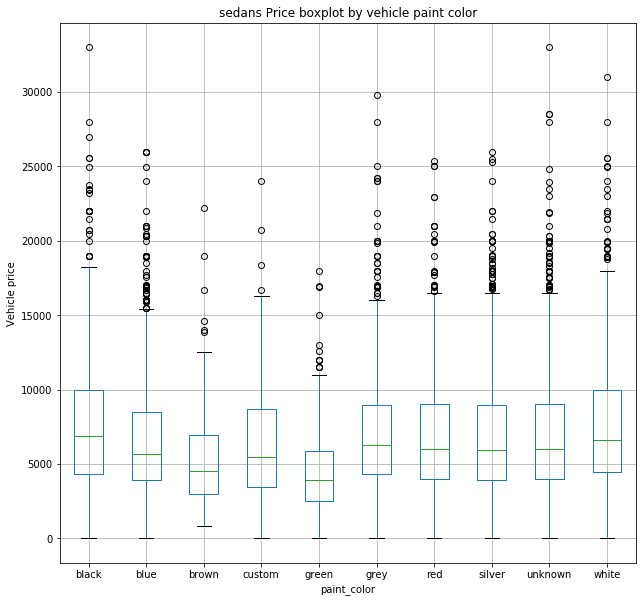

In [85]:
#sedan paint color box plots 
sedan_paint.boxplot(column = 'price', by = 'paint_color', figsize = (10, 10))
plt.title('sedans Price boxplot by vehicle paint color')
plt.ylabel('Vehicle price')
plt.suptitle('')
plt.show()

It seems like most of the vehicle paint colors are in the same price range. Thoght, Black and white are a bit above the other while green and brown seem to be the least expenssive. 

## Conclusion

My research for car sales ads began by revieweing the data set, learning the types of data and the amount of missing data we have. 
Before the analysis could begin I started with preprocessing the data: 

1. The 'is_4wd' colum was missing 50% of its values, I saw that the data set included only 1 so I assumed the missing data is the 0s. 
2. The 'model_year' column was missing only 7% of the data, yet I decided to fill in the missing data with the median year according to the same model and same vehicle condition, assuming a specific model is manufactured in specific years and the vehicle condition it a reflection of it's age (though there exceptions). 
3. The 'odometer' column was missing 15% of the data rows, I filled the missing values with the median value of milage according to the vehicle model year, assuming it's a good representation of the vehicles the are on the road for the same amount of time. 
4. After this, I ended up dropping 7 rows which I could not fill using this methods. 
5. The 'cylinders' column was missing 10 % of the data rows, and thought its impace on the price seemed small (checked using corr() method) I decided to replace these value with the most common cylinders number for the vehicle model, sometime specific model only comes with one option anyway. 
6. The 'paint_color' column had 17% missing data rows and since this data seemed to be missing completely at randon I decided I can't fill it in with specific color so I changed the missing values to 'unknown'.
7. I change variables data types: is_4wd to bool, model_year, cylinders and odometer to int which seemed better suited for these variables. 

I proceeded to making some calculations and adding some aiding columns to the data set - day, week and month that the ad was posted and the age of the vehicle at the year the ad was posted. Also, I replaced the condition column to numeric scale for easier read. 


My analysis included the following steps: 

1. I plotted histograms for the following variable - price, age, milage, cylinders and condition. 
2. I wrote a function to claclulate the upper limit of the values for each variable, using IQR and created a new filtered data set in which I removed all the rows that included values higher than the upper limit (outliars). 
3. Again I plotted the same hisograms as in step 1 just with the filtered data and I could see more easily the range of each variable in our data set. 
4. I investigated the days_listed column to see if there's a reason for longer periods of adevertisment. I learned that the typical time for ads posted is 18 days (also 0 but this might mean there were a lot of posts the days the data was taken), the mean value is 33 days and the median is ~40 days. The upper limit for this column was identified as 104 days. I looked at the data of the vehicle's posts the exceeded the 104th day and could not recognize a specific reason for this, it might just be that these people forget to update the website that the car was sold already. 
5. Looking at the number of ads posted for each vehicle type I determined that the most popular types are SUVs and sedans so I dived dipper to learn what impact the price of these popular vehicles. 
6. Using Pearsong correlation coefficient, scatter plots and boxplots I reviewed the impace of the following variable on the vehicle price: age, odometer, condition, color and transmission type. I came to a conclusion the the variables that impact the most are Vehicle's age, odometer, condition, transmission type and a little bit the paint color. 
7. From the numerical variable the vehicle's age has the most impact on the price. 
8. Transmission type acted the opposite for SUVs and sedans, in the case of SUVs manual  transmission is more expenssive and for the sedans the automatic transmission is prefered. 
9. As for the paint color most of the colors have the same price range, only the black and white seemed a bit more pricy, and for the SUVs the orange paint color would be something to pay good money for. 
